## First look at our data

Source: https://esciencecenter-digital-skills.github.io/scikit-learn-mooc/python_scripts/01_tabular_data_exploration.html

Explore the data interactively
- look at the variables and their types (numerical, categorical)
- look at the distributions (univariate or bivariate)

In [20]:
import pandas as pd 

In [21]:
adult_census = pd.read_csv("../../datasets/adult-census.csv")
adult_census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Explain "record/sample/observation/instance" and "feature/variable/attribute", social sciences vs data science lingo

In [22]:
n_rows, n_cols = adult_census.shape
# print(f"The dataset has {n_rows} rows and {n_cols} columns")
# one of the columns is the target, the others are features

The dataset has 48842 rows and 14 columns


### Inspecting the data: individual columns

- get a feel for the data
- detect particularities
- see if the data are suitable for the task

**be clear that I'll go faster, and let me know if it's too fast/too slow**

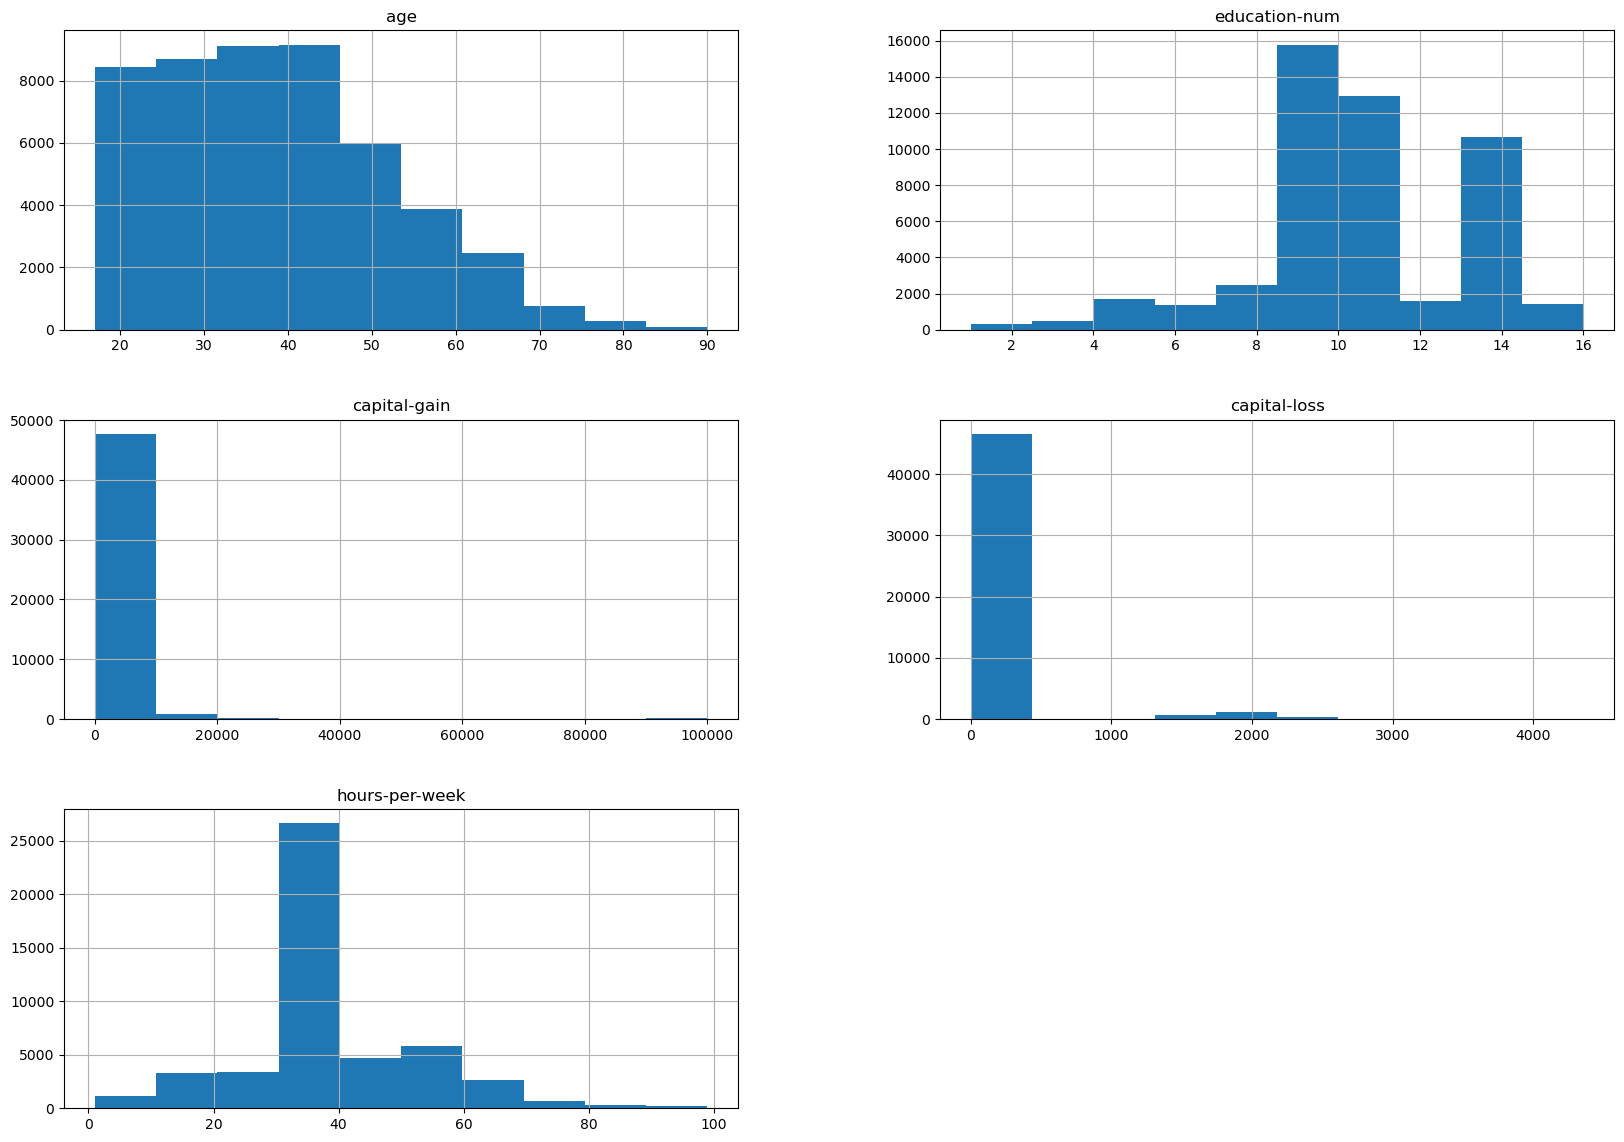

In [23]:
_ = adult_census.hist(figsize=(20,14))

Comments on the data -> keep your intuitions from research
- age: not many above 70 -> what is the model used for? this matters for representativeness
- capital-gain, capital-loss: -> most records have 0. -> data preprocessing before modeling?

#### Imbalance in the target variable

In [24]:
target_column = "class"
adult_census[target_column].value_counts()

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

observations
- need to adjust model to deal with imbalance in the target variable

#### Imbalance in the input data

In [25]:
adult_census["sex"].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

observations
- not representative on the gender dimension
- can cause disproportionate prediction error for under-represented groups
- thus, it's good practice at least to examine the prediction performance across groups and take action if necessary. 

## Inspecting relationships between columns

In [42]:
# pd.crosstab( ## drop this
#     adult_census["education"],
#     adult_census["education-num"]
# )

In [27]:
adult_census = adult_census.drop(columns=["education"])

In [28]:
import seaborn as sns

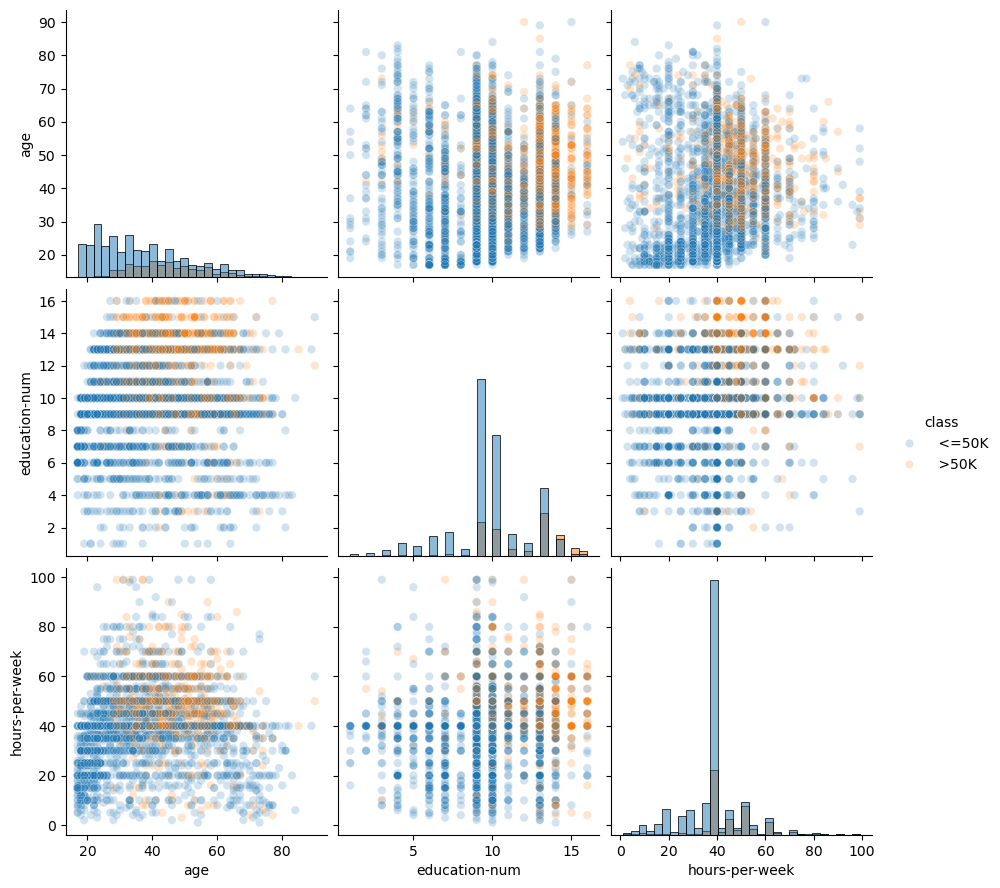

In [29]:
n_samples = 5000
columns = ["age", "education-num", "hours-per-week"]
_ = sns.pairplot(
    data=adult_census[:n_samples],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30}
)

### Exercise: Data exploration (10min,  in groups) [Flavio]


Imagine we are interested in predicting penguins species based on two of their body measurements: culmen length and culmen depth. First we want to do some data exploration to get a feel for the data.

The data is located in `../datasets/penguins_classification.csv`.

Load the data with Python and try to answer the following questions:
1. How many features are numerical? How many features are categorical?
2. What are the different penguins species available in the dataset and how many samples of each species are there?
3. Plot histograms for the numerical features
4. Plot features distribution for each class (Hint: use `seaborn.pairplot`).
5. Looking at the distributions you got, how hard do you think it will be to classify the penguins only using "culmen depth" and "culmen length"?

In [30]:
penguins = pd.read_csv("../../datasets/penguins_classification.csv")

In [35]:
penguins.head()
penguins.columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Species'], dtype='object')

In [32]:
penguins["Species"].value_counts()

Species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

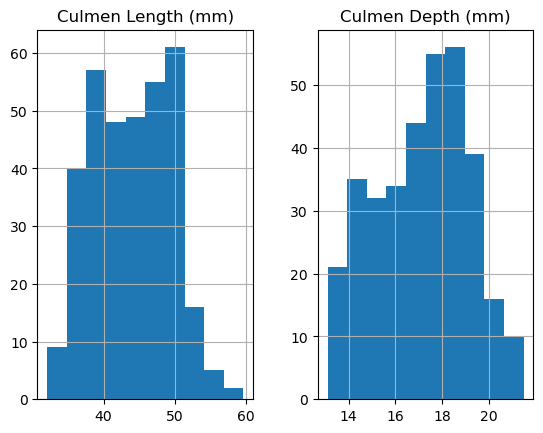

In [33]:
_ = penguins.hist()

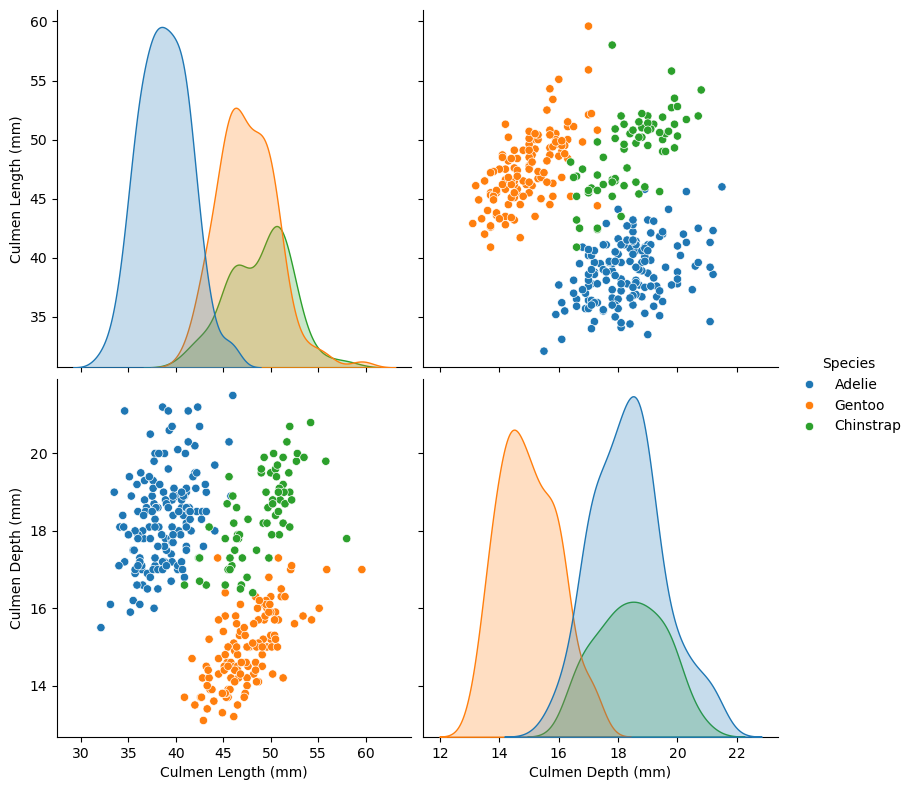

In [40]:
n_samples = 5000
columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
pairplot_figure = sns.pairplot(penguins, hue="Species", height=4)
